Works Fine for a<=8 and b<=7

In [194]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [422]:
#Assign First number
a=7
bin_a=bin(a)
print (bin_a,bin_a[2:])
a_bin=bin_a[2:]
#a_bin=a_bin[::-1] #reversing the list
#a_bin[0]

0b111 111


In [423]:
#Assign second number
b=7
bin_b=bin(b)
print (bin_b,bin_b[2:])
b_bin=bin_b[2:]
print (b_bin,b_bin[0])
#b_bin=b_bin[::-1] # Reversing the list 
b_bin

0b111 111
111 1


'111'

$\quad11$\
$\;+11$\
$=110$

In [424]:
#Making sure they have same number of bits for addition
diff=abs(len(a_bin)-len(b_bin))
print (diff)
if len(a_bin)<len(b_bin):
    a_bin=a_bin.zfill(diff+len(a_bin))
else:
    b_bin=b_bin.zfill(diff+len(b_bin))
print ('a:',a_bin,'length:',len(a_bin))
print ('b:',b_bin,'length',len(b_bin))
b_bin[0]

0
a: 111 length: 3
b: 111 length 3


'1'

In [425]:
c=a+b
bin_c=bin(c)
print (bin_c,bin_c[2:])

0b1110 1110


In [426]:
# Adding a and b using quantum circuit to get c. Checking size of QR and CR!
inputs=len(a_bin)+len(b_bin)+len(bin_c[2:])
outputs=len(bin_c[2:])
print ("No of inputs:",inputs,"\nNo of outputs:",outputs)

No of inputs: 10 
No of outputs: 4


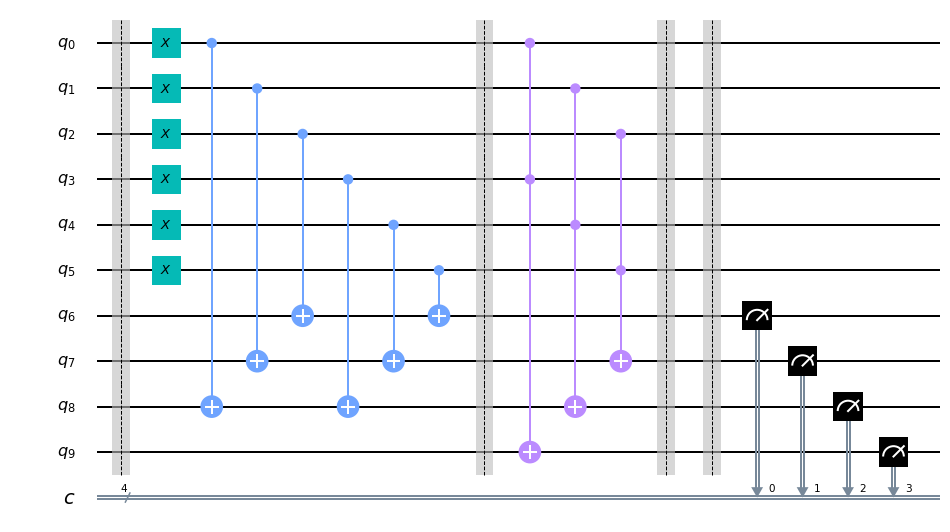

In [427]:
qc=QuantumCircuit(inputs,outputs)
qc.barrier()
#Adding x-gates
for i in range(len(a_bin)):
    if a_bin[i]=='1':
        qc.x(i)
       
    if b_bin[i]=='1':
        qc.x(len(a_bin)+i)
        
#Adding cx-gates
for i in range(len(a_bin)):
    if a_bin[i]=='1':
        #qc.x(i)
        qc.cx(i,3*len(a_bin)-i-1)
    if b_bin[i]=='1':
        qc.cx(len(a_bin)+i, 3*len(a_bin)-i-1)
qc.barrier()
       
#Adding ccx-gates
for i in range(len(a_bin)):
    if a_bin[i]=='1' and b_bin[i]=='1':
        #print(i)
        qc.ccx(i,len(a_bin)+i,inputs-i-1)
qc.barrier()

for i in range(len(a_bin)):
    if i>0:
        if a_bin[i]=='1' and b_bin[i]=='1':
            #print(a_bin[i-1],b_bin[i-1])
            if a_bin[i-1]=='1' or b_bin[i-1]=='1':
                #print(a_bin[i-1],b_bin[i-1])
                if a_bin[i-1] != b_bin[i-1]:
                    #print(a_bin[i-1],b_bin[i-1])
                    qc.ccx(i,len(a_bin)+i,inputs-i)

qc.barrier()


for i in range(outputs):
    #print (len(a_bin)+len(b_bin)+i,i)
    qc.measure(len(a_bin)+len(b_bin)+i,i)
qc.draw(output='mpl')

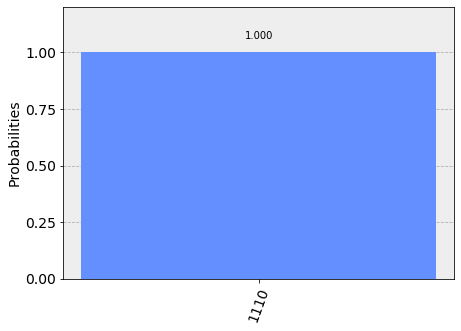

In [428]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [429]:
print ('a=',a,'\nb=',b,'\nsum(c)=',c, '\nEquivalent binary of c:',bin(c)[2:])

a= 7 
b= 7 
sum(c)= 14 
Equivalent binary of c: 1110
